# Work

   1 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
   
   2 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢



In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 269us/step - loss: 2.2736 - acc: 0.1522 - val_loss: 2.2227 - val_acc: 0.2021
Epoch 2/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.1896 - acc: 0.2226 - val_loss: 2.1596 - val_acc: 0.2424
Epoch 3/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.1346 - acc: 0.2503 - val_loss: 2.1103 - val_acc: 0.2648
Epoch 4/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0906 - acc: 0.2712 - val_loss: 2.0699 - val_acc: 0.2799
Epoch 5/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0540 - acc: 0.2849 - val_loss: 2.0367 - val_acc: 0.2910
Epoch 6/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0223 - acc: 0.2978 - val_loss: 2.0057 - val_acc: 0.3024
Epoch 7/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.9944 - acc: 0.3077 - val_loss: 1.9804 

50000/50000 [==============================] - 2s 37us/step - loss: 1.6542 - acc: 0.4223 - val_loss: 1.6626 - val_acc: 0.4178
Epoch 60/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6514 - acc: 0.4237 - val_loss: 1.6612 - val_acc: 0.4122
Epoch 61/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6486 - acc: 0.4238 - val_loss: 1.6564 - val_acc: 0.4199
Epoch 62/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.6455 - acc: 0.4244 - val_loss: 1.6567 - val_acc: 0.4177
Epoch 63/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6429 - acc: 0.4260 - val_loss: 1.6523 - val_acc: 0.4188
Epoch 64/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6402 - acc: 0.4260 - val_loss: 1.6487 - val_acc: 0.4217
Epoch 65/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6373 - acc: 0.4286 - val_loss: 1.6489 - val_acc: 0.4217
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5182 - acc: 0.4693 - val_loss: 1.5487 - val_acc: 0.4560
Epoch 119/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5166 - acc: 0.4705 - val_loss: 1.5468 - val_acc: 0.4565
Epoch 120/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5149 - acc: 0.4717 - val_loss: 1.5463 - val_acc: 0.4558
Epoch 121/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5126 - acc: 0.4720 - val_loss: 1.5488 - val_acc: 0.4554
Epoch 122/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.5111 - acc: 0.4716 - val_loss: 1.5432 - val_acc: 0.4566
Epoch 123/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.5095 - acc: 0.4729 - val_loss: 1.5410 - val_acc: 0.4582
Epoch 124/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5078 - acc: 0.4725 - val_loss: 1.5410 - val_acc: 0.4592
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 39us/step - loss: 1.4232 - acc: 0.5037 - val_loss: 1.4786 - val_acc: 0.4765
Epoch 177/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.4218 - acc: 0.5042 - val_loss: 1.4800 - val_acc: 0.4763
Epoch 178/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.4206 - acc: 0.5045 - val_loss: 1.4740 - val_acc: 0.4786
Epoch 179/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4186 - acc: 0.5044 - val_loss: 1.4802 - val_acc: 0.4735
Epoch 180/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.4175 - acc: 0.5060 - val_loss: 1.4730 - val_acc: 0.4811
Epoch 181/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4155 - acc: 0.5069 - val_loss: 1.4753 - val_acc: 0.4778
Epoch 182/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.4148 - acc: 0.5068 - val_loss: 1.4749 - val_acc: 0.4770
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 41us/step - loss: 1.3425 - acc: 0.5313 - val_loss: 1.4267 - val_acc: 0.4967
Epoch 235/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.3407 - acc: 0.5314 - val_loss: 1.4263 - val_acc: 0.4976
Epoch 236/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.3394 - acc: 0.5325 - val_loss: 1.4292 - val_acc: 0.4966
Epoch 237/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3383 - acc: 0.5337 - val_loss: 1.4358 - val_acc: 0.4878
Epoch 238/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3369 - acc: 0.5337 - val_loss: 1.4271 - val_acc: 0.4934
Epoch 239/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.3355 - acc: 0.5338 - val_loss: 1.4243 - val_acc: 0.4932
Epoch 240/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.3340 - acc: 0.5338 - val_loss: 1.4305 - val_acc: 0.4931
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 39us/step - loss: 1.2694 - acc: 0.5576 - val_loss: 1.3887 - val_acc: 0.5083
Epoch 293/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2682 - acc: 0.5568 - val_loss: 1.3874 - val_acc: 0.5098
Epoch 294/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2666 - acc: 0.5576 - val_loss: 1.3891 - val_acc: 0.5070
Epoch 295/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2656 - acc: 0.5586 - val_loss: 1.3894 - val_acc: 0.5060
Epoch 296/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2647 - acc: 0.5581 - val_loss: 1.3899 - val_acc: 0.5042
Epoch 297/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.2636 - acc: 0.5595 - val_loss: 1.3959 - val_acc: 0.5041
Epoch 298/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.2619 - acc: 0.5587 - val_loss: 1.4099 - val_acc: 0.4965
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 38us/step - loss: 1.2027 - acc: 0.5800 - val_loss: 1.3726 - val_acc: 0.5087
Epoch 351/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2006 - acc: 0.5815 - val_loss: 1.3757 - val_acc: 0.5063
Epoch 352/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2005 - acc: 0.5818 - val_loss: 1.3766 - val_acc: 0.5141
Epoch 353/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1983 - acc: 0.5828 - val_loss: 1.3625 - val_acc: 0.5177
Epoch 354/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.1978 - acc: 0.5834 - val_loss: 1.3650 - val_acc: 0.5117
Epoch 355/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1960 - acc: 0.5816 - val_loss: 1.3622 - val_acc: 0.5160
Epoch 356/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1951 - acc: 0.5828 - val_loss: 1.3729 - val_acc: 0.5131
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 38us/step - loss: 1.1386 - acc: 0.6031 - val_loss: 1.3490 - val_acc: 0.5219
Epoch 409/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.1369 - acc: 0.6043 - val_loss: 1.3634 - val_acc: 0.5123
Epoch 410/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1363 - acc: 0.6040 - val_loss: 1.3460 - val_acc: 0.5254
Epoch 411/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.1348 - acc: 0.6047 - val_loss: 1.3392 - val_acc: 0.5265
Epoch 412/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.1348 - acc: 0.6052 - val_loss: 1.3426 - val_acc: 0.5214
Epoch 413/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.1334 - acc: 0.6059 - val_loss: 1.3669 - val_acc: 0.5116
Epoch 414/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.1318 - acc: 0.6047 - val_loss: 1.3503 - val_acc: 0.5187
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 39us/step - loss: 1.0797 - acc: 0.6258 - val_loss: 1.3812 - val_acc: 0.5037
Epoch 467/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.0775 - acc: 0.6264 - val_loss: 1.3591 - val_acc: 0.5129
Epoch 468/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.0787 - acc: 0.6255 - val_loss: 1.3744 - val_acc: 0.5157
Epoch 469/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.0746 - acc: 0.6285 - val_loss: 1.3440 - val_acc: 0.5239
Epoch 470/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0739 - acc: 0.6272 - val_loss: 1.3472 - val_acc: 0.5212
Epoch 471/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.0698 - acc: 0.6291 - val_loss: 1.4094 - val_acc: 0.5083
Epoch 472/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0707 - acc: 0.6287 - val_loss: 1.3567 - val_acc: 0.5206
Epoch 473/500
50000/50000 [=======

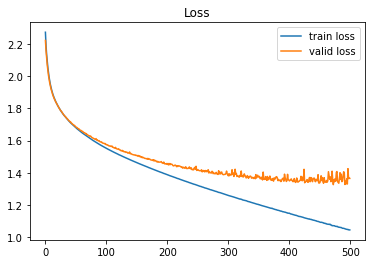

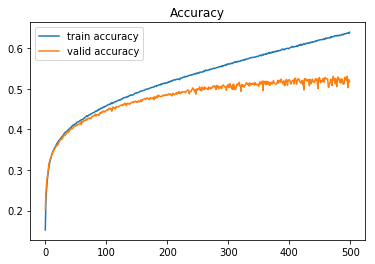

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()